# IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.chdir("C:\CLASS DATA SETS")
df = pd.read_csv("Titanic.csv")

# EDA

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Shelley, Mrs. William (Imanita Parrish Hall)",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# filling the missing values
df['Age'].fillna(df['Age'].mean(),inplace=True)


In [9]:
df1 = df.fillna({"Embarked": "S"})

In [10]:
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

# LETS GET SOME INSIGHT OF DATA THROUGH VISUALIZATION

Age variable

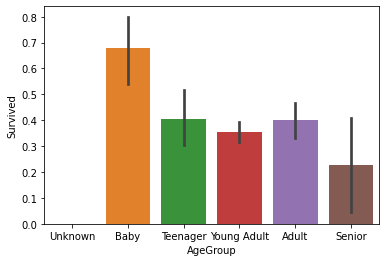

In [20]:
#sort the ages into logical categories
df1["Age"] = df1["Age"].fillna(-0.5)

bins = [-1, 0, 7,18, 35,60, np.inf]
labels = ['Unknown', 'Baby','Teenager','Young Adult', 'Adult', 'Senior']
df1['AgeGroup'] = pd.cut(df1["Age"], bins, labels = labels)

#draw a bar plot of Age vs. survival
sns.barplot(x="AgeGroup", y="Survived", data=df1)
plt.show()


Babies are more likely to survive

Embarked variable

In [21]:
#For Embarked variable
print("Number of people embarking in Southampton (S):")
southampton = df1[df1["Embarked"] == "S"].shape[0]
print(southampton)

print("Number of people embarking in Cherbourg (C):")
cherbourg = df1[df1["Embarked"] == "C"].shape[0]
print(cherbourg)

print("Number of people embarking in Queenstown (Q):")
queenstown = df1[df1["Embarked"] == "Q"].shape[0]
print(queenstown)

Number of people embarking in Southampton (S):
646
Number of people embarking in Cherbourg (C):
168
Number of people embarking in Queenstown (Q):
77


Percentage of people Embarked in Southampton who survived: 33.90092879256966
Percentage of people Embarked in Cherbourg who survived: 55.35714285714286
Percentage of people Embarked in Queenstown who survived: 38.961038961038966


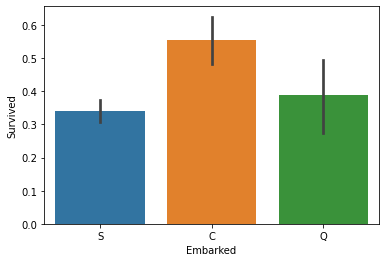

In [22]:
sns.barplot(x = 'Embarked', y = 'Survived',data = df1)
print("Percentage of people Embarked in Southampton who survived:", df1["Survived"][df1["Embarked"] == 'S'].value_counts(normalize = True)[1]*100)

print("Percentage of people Embarked in Cherbourg who survived:", df1["Survived"][df1["Embarked"] == 'C'].value_counts(normalize = True)[1]*100)

print("Percentage of people Embarked in Queenstown who survived:", df1["Survived"][df1["Embarked"] == 'Q'].value_counts(normalize = True)[1]*100)
plt.show()

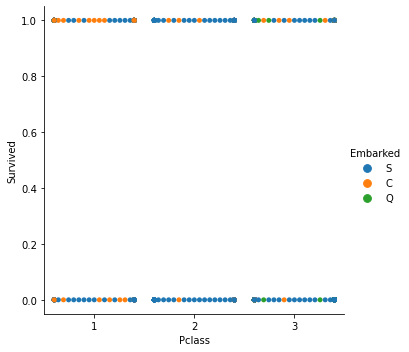

In [23]:
sns.catplot(x="Pclass", y="Survived", hue="Embarked",  kind="swarm",data=df1);

From above plots we can say that people embarking in Cherbourg are more likely to survive than the others.
Also we can say that people purchasing first class ticket and Embarking to Cherbourgh have slightly better chance of survival than the others.

Sex variable

Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


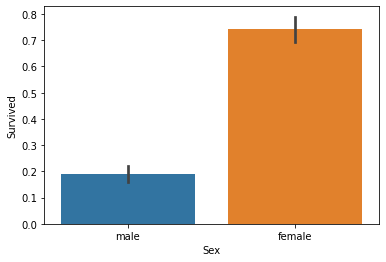

In [24]:
#draw a bar plot of survival by sex
sns.barplot(x="Sex", y="Survived", data=df1)

#print percentages of females vs. males that survive
print("Percentage of females who survived:", df1["Survived"][df1["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("Percentage of males who survived:", df1["Survived"][df1["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

we can see that chances of survival of female were greater than male.

Pclass variable

Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847


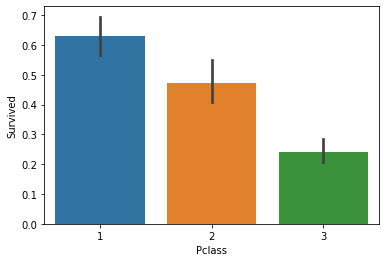

In [25]:
sns.barplot(x="Pclass", y="Survived", data=df1)

#print percentage of people by Pclass that survived
print("Percentage of Pclass = 1 who survived:", df1["Survived"][df1["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 2 who survived:", df1["Survived"][df1["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 3 who survived:", df1["Survived"][df1["Pclass"] == 3].value_counts(normalize = True)[1]*100)


We can see that first Class people were more likely to survive

Sibsp variable

Percentage of SibSp = 0 who survived: 34.53947368421053
Percentage of SibSp = 1 who survived: 53.588516746411486
Percentage of SibSp = 2 who survived: 46.42857142857143


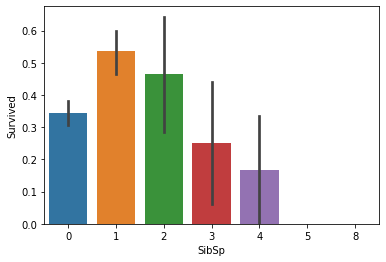

In [26]:
sns.barplot(x="SibSp", y="Survived", data=df1)

#I won't be printing individual percent values for all of these.
print("Percentage of SibSp = 0 who survived:", df1["Survived"][df1["SibSp"] == 0].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 1 who survived:", df1["Survived"][df1["SibSp"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 2 who survived:", df1["Survived"][df1["SibSp"] == 2].value_counts(normalize = True)[1]*100)

It is clear that people with more siblings or spouses aboard were less likely to survive.

Parch variable

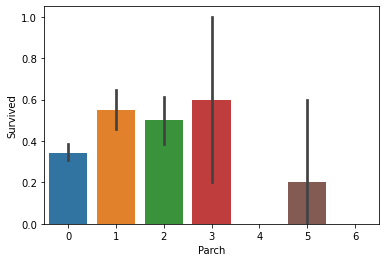

In [27]:
sns.barplot(x="Parch", y="Survived", data=df1)
plt.show()

People traveling alone are less likely to survive than those with 1-3 parents.

# DATA CLEANING

In [35]:
df1.drop(['Fare','Name','Cabin','Ticket'],axis=1,inplace=True)

In [36]:
df1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,AgeGroup
0,1,0,3,male,22.0,1,0,S,Young Adult
1,2,1,1,female,38.0,1,0,C,Adult
2,3,1,3,female,26.0,0,0,S,Young Adult
3,4,1,1,female,35.0,1,0,S,Young Adult
4,5,0,3,male,35.0,0,0,S,Young Adult


In [41]:
sex=pd.get_dummies(df1['Sex'],drop_first=True)

train = pd.concat([df1,sex],axis=1)

In [42]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,AgeGroup,male
0,1,0,3,male,22.0,1,0,S,Young Adult,1
1,2,1,1,female,38.0,1,0,C,Adult,0
2,3,1,3,female,26.0,0,0,S,Young Adult,0
3,4,1,1,female,35.0,1,0,S,Young Adult,0
4,5,0,3,male,35.0,0,0,S,Young Adult,1


In [43]:
train['Embarked'] = train['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)


In [44]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,AgeGroup,male
0,1,0,3,male,22.0,1,0,0,Young Adult,1
1,2,1,1,female,38.0,1,0,1,Adult,0
2,3,1,3,female,26.0,0,0,0,Young Adult,0
3,4,1,1,female,35.0,1,0,0,Young Adult,0
4,5,0,3,male,35.0,0,0,0,Young Adult,1


In [48]:
df2 = train.drop(['PassengerId','Sex','AgeGroup'],axis= 1)


In [49]:
df2.head()

,Survived,Pclass,Age,SibSp,Parch,Embarked,male
0,0,3,22.0,1,0,0,1
1,1,1,38.0,1,0,1,0
2,1,3,26.0,0,0,0,0
3,1,1,35.0,1,0,0,0
4,0,3,35.0,0,0,0,1


In [50]:
df2.isnull().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Embarked    0
male        0
dtype: int64

In [59]:
X = df2.drop("Survived",axis=1)
Y = df2["Survived"]

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
lr = LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [64]:
pred = lr.predict(X_test)

In [65]:
from sklearn.metrics import accuracy_score,f1_score, precision_score,recall_score,roc_auc_score


In [66]:
accuracy = accuracy_score(Y_test, pred)
#harmonic mean(f1)
f1 = f1_score(Y_test, pred)
precision = precision_score(Y_test,pred)
recall = recall_score(Y_test, pred)
roc_auc = roc_auc_score(Y_test, pred)
print('Accuraccy is: ',accuracy)
print('f1 score is: ',f1)
print('precision is: ',precision)
print('recall is: ',recall)
print('roc auc is: ',roc_auc)

Accuraccy is:  0.7985074626865671
f1 score is:  0.7244897959183674
precision is:  0.7395833333333334
recall is:  0.71
roc auc is:  0.780595238095238


In [67]:
from sklearn.metrics import confusion_matrix

In [70]:
confusion_matrix(Y_test,pred)

array([[143,  25],
       [ 29,  71]], dtype=int64)